## Imports copypasta

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits

from sklearn.model_selection import cross_val_score

from sklearn import tree

import sklearn

In [3]:

data = load_digits()
X, Y = data.data, data.target

In [4]:
print(len(X))
print(len(X[0]))
print(len(Y))

1797
64
1797


In [5]:
%%time
lr_predictor = sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                            C=1.0, fit_intercept=True, intercept_scaling=1, 
                                            class_weight=None, random_state=1998, solver='newton-cg', 
                                            max_iter=100, multi_class='ovr', verbose=0, 
                                            warm_start=False, n_jobs=None)

dt_predictor = sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                   max_features=None, random_state=1998, max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
                                                   )

lr_scores = cross_val_score(lr_predictor, X, Y, cv=5)
print(lr_scores)
dt_scores = cross_val_score(dt_predictor, X, Y, cv=5)
print(dt_scores)

[0.90934066 0.87845304 0.94707521 0.96358543 0.89014085]
[0.78296703 0.7320442  0.77994429 0.82633053 0.78591549]
Wall time: 2.92 s


In [67]:
%time X_mnist, Y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

Wall time: 19.9 s


In [68]:
print(len(X_mnist))
print(len(Y_mnist))

70000
70000


In [69]:
X = X_mnist[0:1000]
Y = Y_mnist[0:1000]
print(len(X), ' ', len(Y))

1000   1000


In [86]:
lr_predictor = sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                            C=1.0, fit_intercept=True, intercept_scaling=1, 
                                            class_weight=None, random_state=1998, solver='saga', 
                                            max_iter=100, multi_class='ovr', verbose=0, 
                                            warm_start=False, n_jobs=5)

lr_predictor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=5,
          penalty='l2', random_state=1998, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
lr_scores = cross_val_score(lr_predictor, X, Y, cv=5)
# lr_predictor.fit(X, Y)
print(lr_scores.sum() / len(lr_scores))

d:\utilites\programming\anaconda-python\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  else:


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [40]:
dt_predictor = sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                   max_features=None, random_state=1998, max_leaf_nodes=None,
                                                   min_impurity_decrease=0.1, min_impurity_split=None, class_weight=None, 
                                                   )

In [41]:
dt_scores = cross_val_score(dt_predictor, X, Y, cv=5)
print(dt_scores)

[0.11764706 0.11330049 0.11557789 0.11616162 0.11734694]


In [76]:
dt_predictor = sklearn.tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, 
                                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                   max_features=None, random_state=1998, max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
                                                   )

dt_scores = cross_val_score(dt_predictor, X, Y, cv=5)
print(dt_scores.sum() / len(dt_scores))

0.6739808360136166


In [15]:
import graphviz

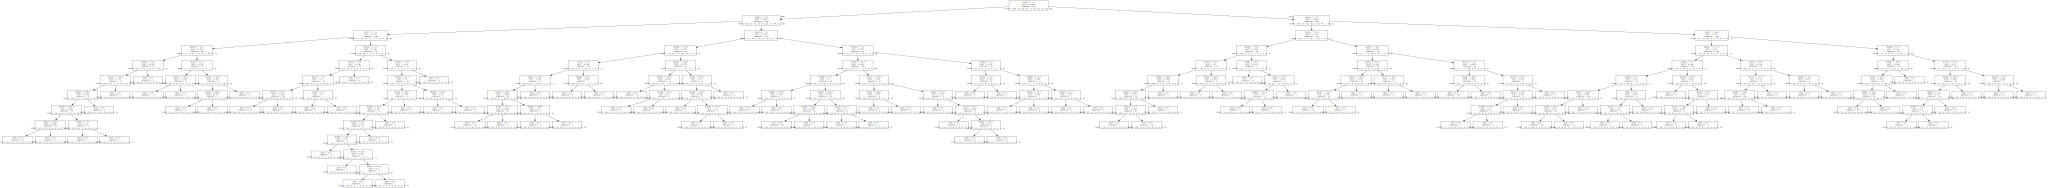

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.33)
dt_predictor.fit(train_data, train_labels)

r = sklearn.tree.export.export_graphviz(dt_predictor)
graph = graphviz.Source(r)
graph

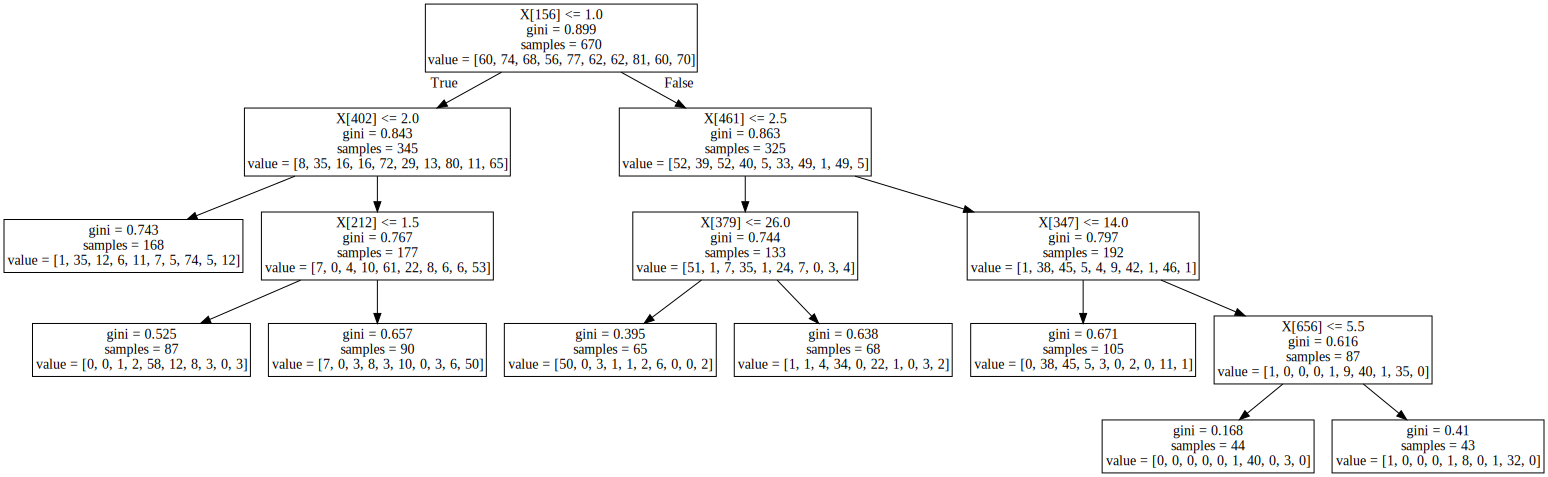

In [90]:
dt_predictor = sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                                   max_features=None, random_state=1998, max_leaf_nodes=None,
                                                   min_impurity_decrease=0.04, min_impurity_split=None, class_weight=None, 
                                                   )

dt_predictor.fit(train_data, train_labels)
r = sklearn.tree.export.export_graphviz(dt_predictor)
graph = graphviz.Source(r)
graph


In [91]:
dt_scores = cross_val_score(dt_predictor, X, Y, cv=5)
print(dt_scores.sum() / len(dt_scores))

0.4212443380654037
